## K-means clustering

In this chapter, you will build an understanding of the principles behind the k-means algorithm, learn how to select the right k when it isn't previously known, and revisit the wholesale data from a different perspective.

### K-means on a soccer field
In the previous chapter you used the lineup dataset to learn about hierarchical clustering, in this chapter you will use the same data to learn about k-means clustering. As a reminder, the lineup data frame contains the positions of 12 players at the start of a 6v6 soccer match.

Just like before, you know that this match has two teams on the field so you can perform a k-means analysis using k = 2 in order to determine which player belongs to which team.

Note that in the kmeans() function k is specified using the centers parameter.

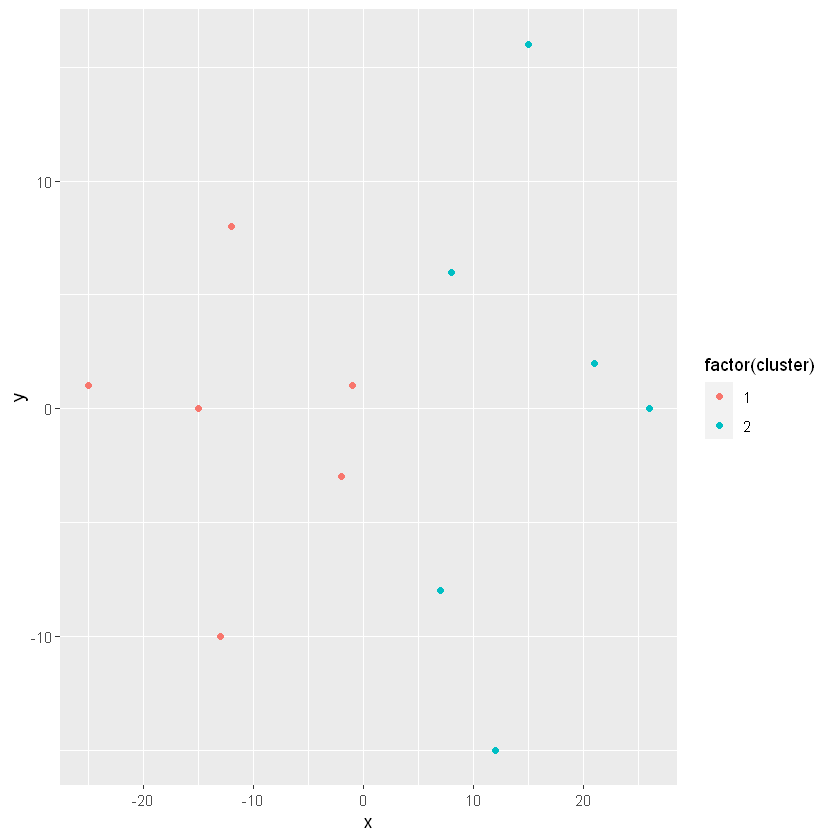

In [2]:
library(dplyr)
library(ggplot2)

lineup <- readRDS("lineup.rds")

# Build a kmeans model
model_km2 <- kmeans(lineup, centers = 2)

# Extract the cluster assignment vector from the kmeans model
clust_km2 <- model_km2$cluster

# Create a new data frame appending the cluster assignment
lineup_km2 <- mutate(lineup, cluster = clust_km2)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km2, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

### K-means on a soccer field (part 2)
In the previous exercise you successfully used the k-means algorithm to cluster the two teams from the lineup data frame. This time, let's explore what happens when you use a k of 3.

You will see that the algorithm will still run, but does it actually make sense in this context…

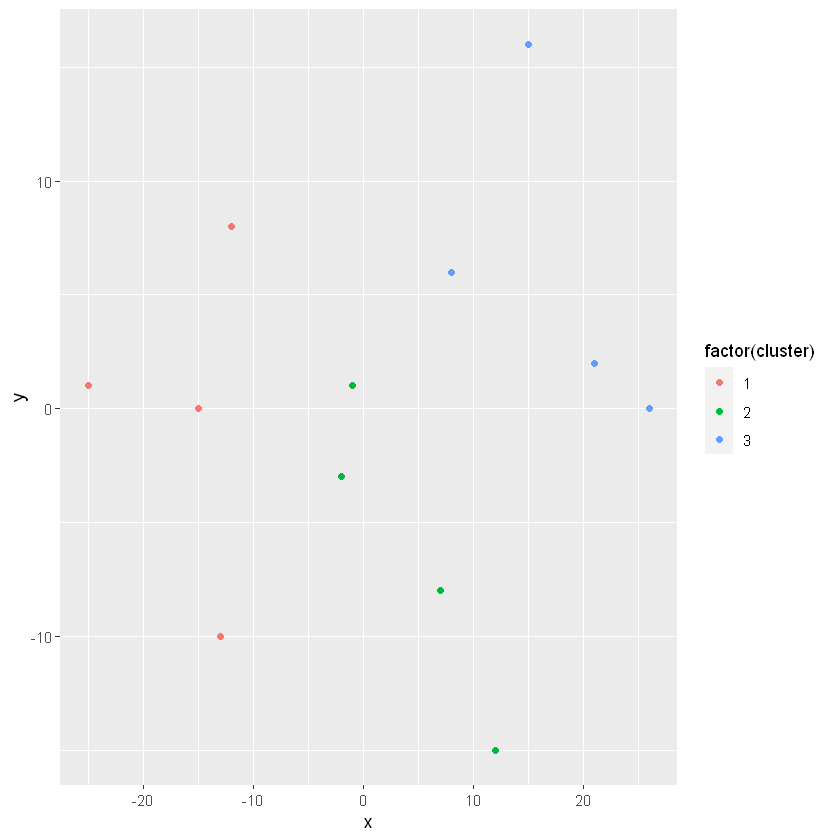

In [3]:
# Build a kmeans model
model_km3 <- kmeans(lineup, centers = 3)

# Extract the cluster assignment vector from the kmeans model
clust_km3 <- model_km3$cluster

# Create a new data frame appending the cluster assignment
lineup_km3 <- mutate(lineup, cluster = clust_km3)

# Plot the positions of the players and color them using their cluster
ggplot(lineup_km3, aes(x = x, y = y, color = factor(cluster))) +
  geom_point()

### Many K's many models
While the lineup dataset clearly has a known value of k, often times the optimal number of clusters isn't known and must be estimated.

In this exercise you will leverage map_dbl() from the purrr library to run k-means using values of k ranging from 1 to 10 and extract the total within-cluster sum of squares metric from each one. This will be the first step towards visualizing the elbow plot.

In [5]:
library(purrr)

# Use map_dbl to run many models with varying value of k (centers)
tot_withinss <- map_dbl(1:10,  function(k){
  model <- kmeans(x = lineup, centers = k)
  model$tot.withinss
})

# Generate a data frame containing both k and tot_withinss
elbow_df <- data.frame(
  k = 1:10 ,
  tot_withinss = tot_withinss
)

elbow_df

k,tot_withinss
1,3489.9167
2,1434.5000
3,940.8333
4,622.5000
5,496.4167
6,387.5000
7,171.0000
8,134.0000
9,59.5000
10,83.0000


### Elbow (Scree) plot
In the previous exercises you have calculated the total within-cluster sum of squares for values of k ranging from 1 to 10. You can visualize this relationship using a line plot to create what is known as an elbow plot (or scree plot).

When looking at an elbow plot you want to see a sharp decline from one k to another followed by a more gradual decrease in slope. The last value of k before the slope of the plot levels off suggests a "good" value of k.

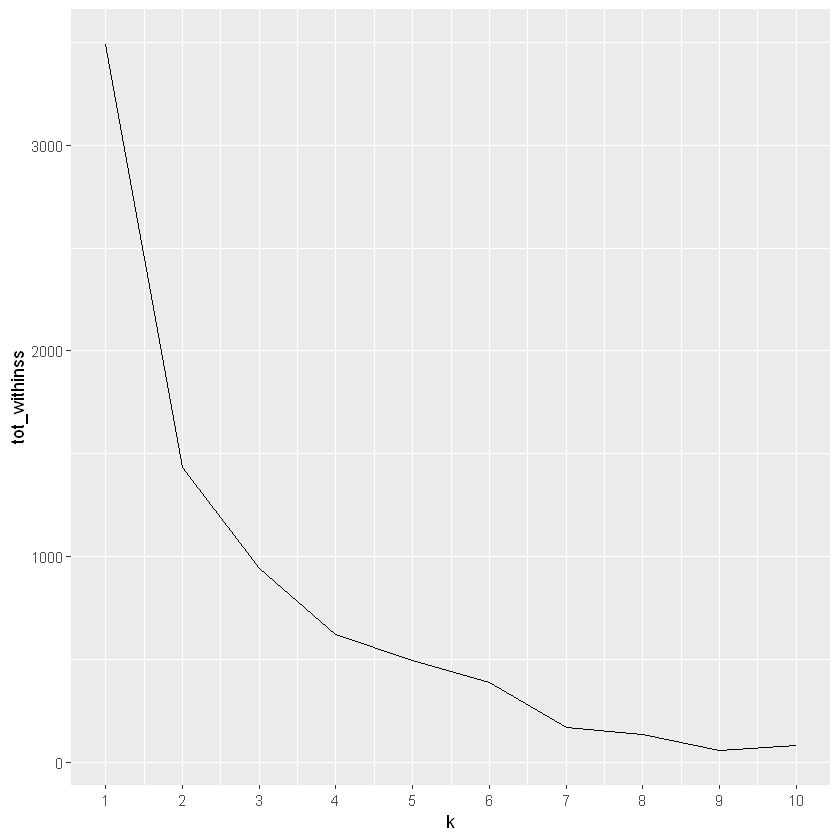

In [6]:
# Plot the elbow plot
ggplot(elbow_df, aes(x = k, y = tot_withinss)) +
  geom_line() +
  scale_x_continuous(breaks = 1:10)

### Silhouette analysis
Silhouette analysis allows you to calculate how similar each observations is with the cluster it is assigned relative to other clusters. This metric (silhouette width) ranges from -1 to 1 for each observation in your data and can be interpreted as follows:

1. Values close to 1 suggest that the observation is well matched to the assigned cluster
2. Values close to 0 suggest that the observation is borderline matched between two clusters
3. Values close to -1 suggest that the observations may be assigned to the wrong cluster

In this exercise you will leverage the pam() and the silhouette() functions from the cluster

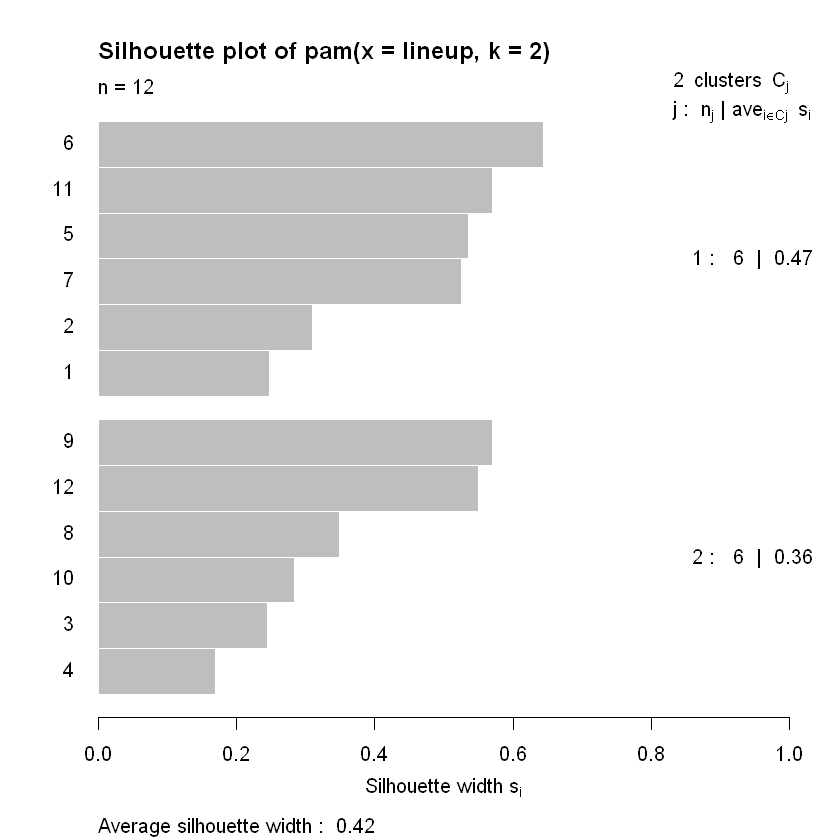

In [7]:
library(cluster)

# Generate a k-means model using the pam() function with a k = 2
pam_k2 <- pam(lineup, k = 2)

# Plot the silhouette visual for the pam_k2 model
plot(silhouette(pam_k2))

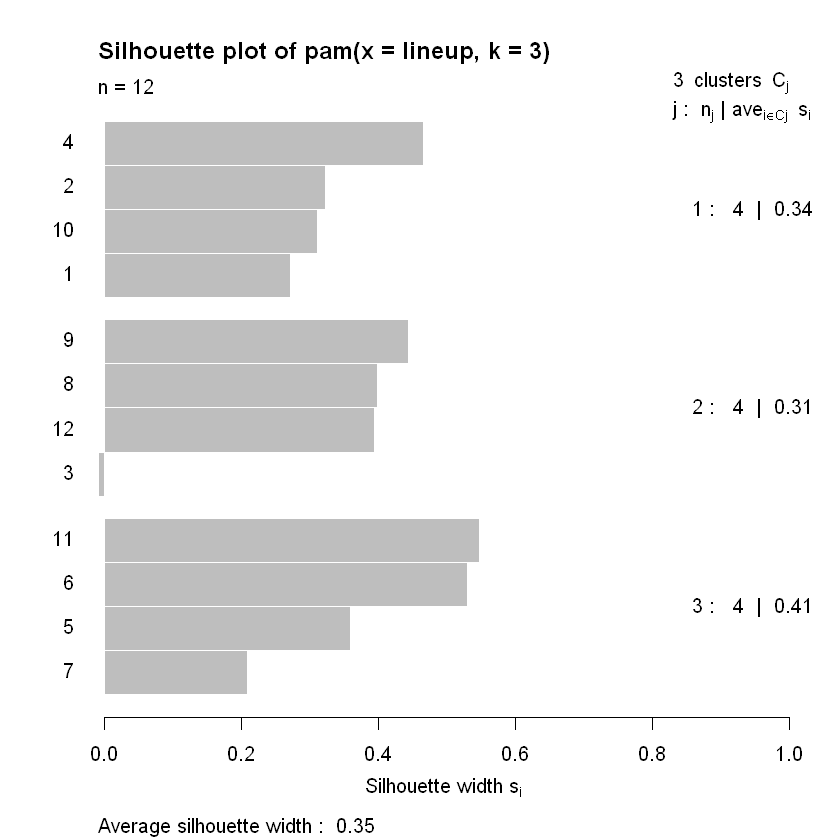

In [8]:
# Generate a k-means model using the pam() function with a k = 3
pam_k3 <- pam(lineup, k = 3)

# Plot the silhouette visual for the pam_k3 model
plot(silhouette(pam_k3))

k,sil_width
2,0.4164141
3,0.3534140
4,0.3535534
5,0.3724115
6,0.3436130
7,0.3236397
8,0.3275222
9,0.2547311
10,0.2099424


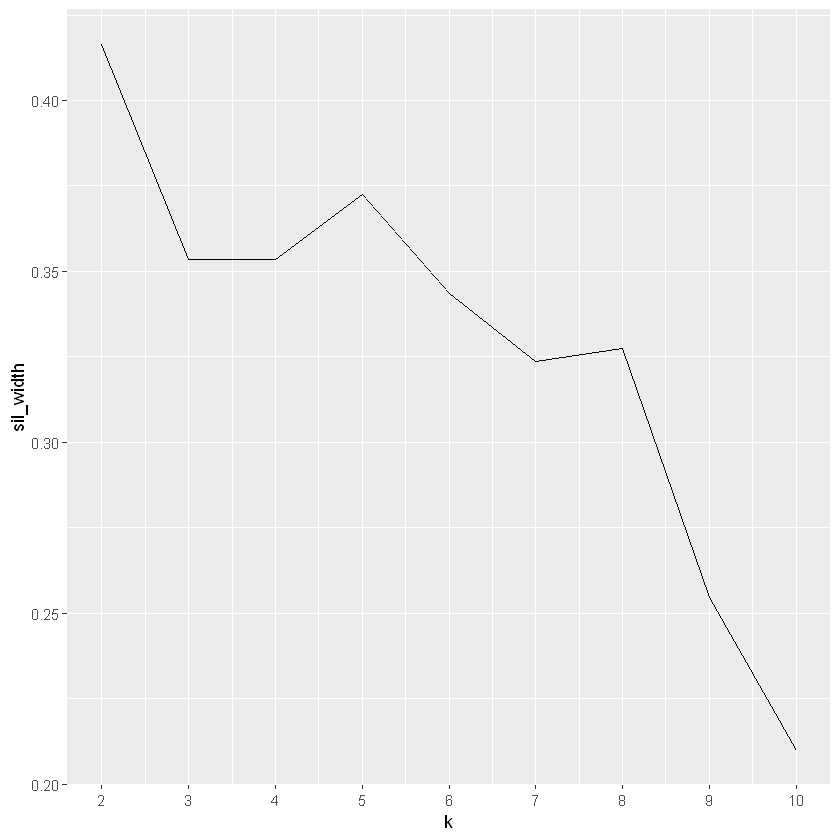

In [12]:
# Use map_dbl to run many models with varying value of k (centers)
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(x = lineup, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and silhouette width
sil_df <- data.frame(
  k = 2:10 ,
  sil_width = sil_width
)

sil_df

# Plot the sil_widht plot
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)

# check k = 2 has the highest sil_width, so the "best" k

### Revisiting wholesale data: "Best" k
At the end of Chapter 2 you explored wholesale distributor data customers_spend using hierarchical clustering. This time you will analyze this data using the k-means clustering tools covered in this chapter.

The first step will be to determine the "best" value of k using average silhouette width.

A refresher about the data: it contains records of the amount spent by 45 different clients of a wholesale distributor for the food categories of Milk, Grocery & Frozen. This is stored in the data frame customers_spend. For this exercise you can assume that because the data is all of the same type (amount spent) and you will not need to scale it.

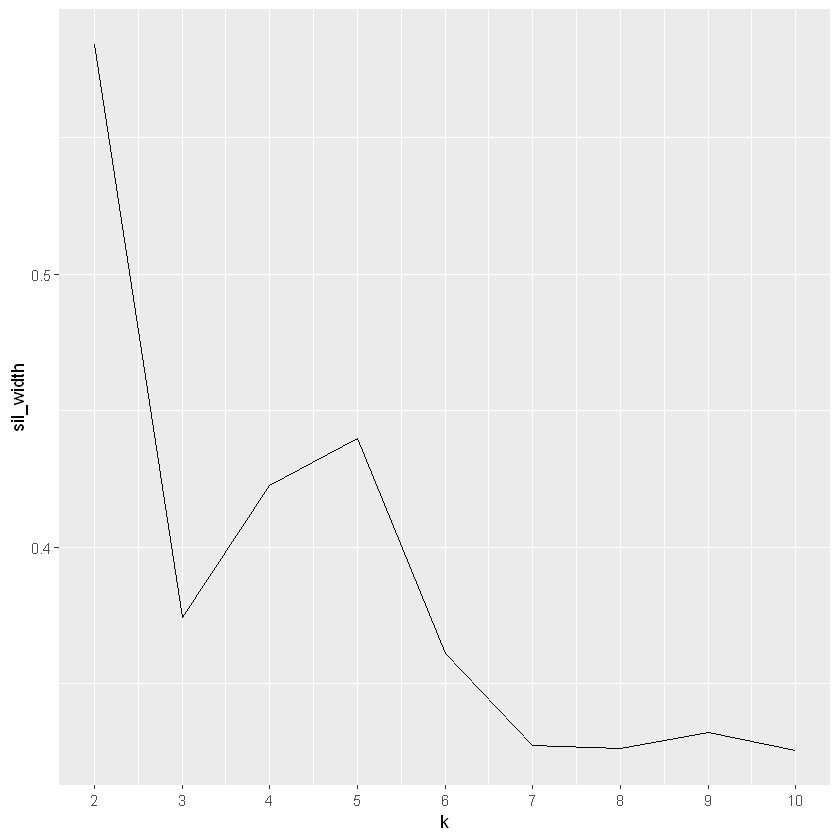

In [13]:
customers_spend <- readRDS("ws_customers.rds")

# Use map_dbl to run many models with varying value of k
sil_width <- map_dbl(2:10,  function(k){
  model <- pam(x = customers_spend, k = k)
  model$silinfo$avg.width
})

# Generate a data frame containing both k and sil_width
sil_df <- data.frame(
  k = 2:10,
  sil_width = sil_width
)

# Plot the relationship between k and sil_width
ggplot(sil_df, aes(x = k, y = sil_width)) +
  geom_line() +
  scale_x_continuous(breaks = 2:10)

# From the plot noticed that k = 2 has the highest average sillhouette width and is the “best” value of k.

### Revisiting wholesale data: Exploration
From the previous analysis you have found that k = 2 has the highest average silhouette width. In this exercise you will continue to analyze the wholesale customer data by building and exploring a kmeans model with 2 clusters.

In [20]:
set.seed(42)

# Build a k-means model for the customers_spend with a k of 2
model_customers <- kmeans(customers_spend, centers = 2)

# Extract the vector of cluster assignments from the model
clust_customers <- model_customers$cluster

# Build the segment_customers data frame
segment_customers <- mutate(customers_spend, cluster = clust_customers)

# Calculate the size of each cluster
count(segment_customers, cluster)

# Calculate the mean for each category
segment_customers %>% 
  group_by(cluster) %>% 
  summarise_all(list(mean))

cluster,n
1,35
2,10


cluster,Milk,Grocery,Frozen
1,2296.257,5004,3354.343
2,13701.100,17721,1173.000


Did you notice that when you explored this data using hierarchical clustering, the method resulted in 4 clusters while using k-means got you 2. Both of these results are valid, but which one is appropriate for this would require more subject matter expertise. Before you proceed with the next chapter, remember that: Generating clusters is a science, but interpreting them is an art.